In [1]:
%matplotlib inline
import os
import calendar
from pathlib import Path
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt

# HOMEWORK 1

__•__	Import nycovid.csv data and rename columns as necessary. Plot number of positive covid cases and the number of tests. Also, plot the related 7 days moving average (e.g., df. .rolling(window=7).mean().fillna(0)). Structure your plots as Figure 3.9.

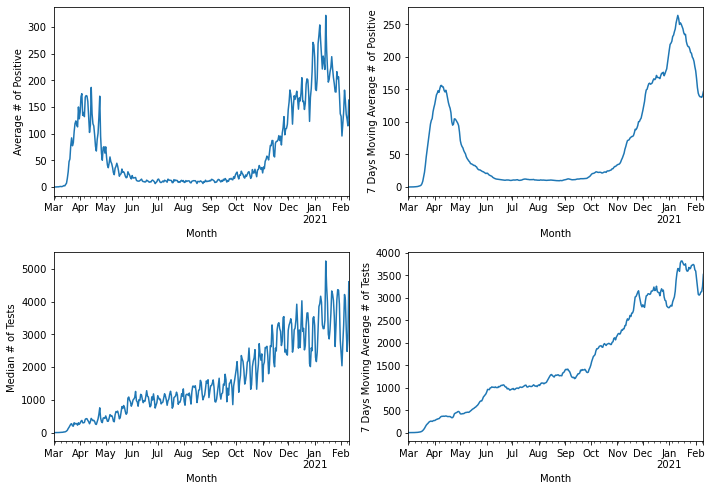

In [4]:
covid_df = pd.read_csv('nycovid.csv')
cols = [i.replace(' ', '_') for i in covid_df.columns]
covid_df.columns = cols
covid_df['Test_Date'] = pd.to_datetime(covid_df.Test_Date)
covid_df.set_index('Test_Date', inplace=True)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
#Median number of positive cases 
byMonth1 = covid_df.groupby(by=[covid_df.index]).mean()
ax = byMonth1.Number_Positive.plot(legend=False, ax=axes[0][0])
ax.set_xlabel('Month')  # set x-axis label
ax.set_ylabel('Average # of Positive')  # set y-axis label


# Average number of positive by month
byMonth2 = covid_df.groupby(by=[covid_df.index]).mean()
byMonth2['7Days_MA'] = byMonth2.Number_Positive.rolling(window=7).mean().fillna(0)
ax = byMonth2['7Days_MA'].plot(legend=False, ax=axes[0][1])
ax.set_xlabel('Month')  # set x-axis label
ax.set_ylabel('7 Days Moving Average # of Positive')  # set y-axis label



# Median number of tests by month
byMonth3 = covid_df.groupby(by=[covid_df.index]).mean()
ax = byMonth3.Number_Tests.plot(legend=False, ax=axes[1][0])
ax.set_xlabel('Month')  # set x-axis label
ax.set_ylabel('Median # of Tests')  # set y-axis label

# Average number of tests by month
byMonth4 = covid_df.groupby(by=[covid_df.index]).mean()
byMonth4['7Days_MA'] = byMonth4.Number_Tests.rolling(window=7).mean().fillna(0)
ax = byMonth4['7Days_MA'].plot(legend=False, ax=axes[1][1])
ax.set_xlabel('Month')  # set x-axis label
ax.set_ylabel('7 Days Moving Average # of Tests')  # set y-axis label

plt.tight_layout()

plt.show()

__•__	Create a scatter plot (with counties as labels) of the average number of positive cases between September 2020 and February 11, 2021. Your plot should look like Figure 3.10. 

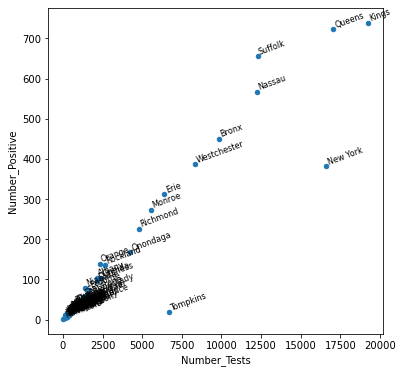

In [398]:
covid_df = pd.read_csv('nycovid.csv')
cols = [i.replace(' ', '_') for i in covid_df.columns]
covid_df.columns = cols
covid_df['Test_Date'] = pd.to_datetime(covid_df.Test_Date)
covid_df.set_index('Test_Date', inplace=True)
covid_df = covid_df.loc['2020-09-01':'2021-02-11']


new_df = covid_df.groupby('County').mean()
new_df['County'] = new_df.index
ax = new_df.plot.scatter(x='Number_Tests', y='Number_Positive', figsize=(6, 6))
points = new_df[['Number_Tests','Number_Positive','County']]
points = points.apply(lambda x: 
             ax.text(*x, rotation=20, horizontalalignment='left',
                     verticalalignment='bottom', fontsize=8), axis=1)

plt.show()

__•__	Create box plots of the average rate of positive cases in these counties: ['New York', 'Kings', 'Bronx', 'Richmond', 'Queens', 'Westchester', 'Erie',   'Monroe', 'Richmond', 'Onondaga', 'Tompkins'] (e.g., your boxplots may look like Figure 3.3)

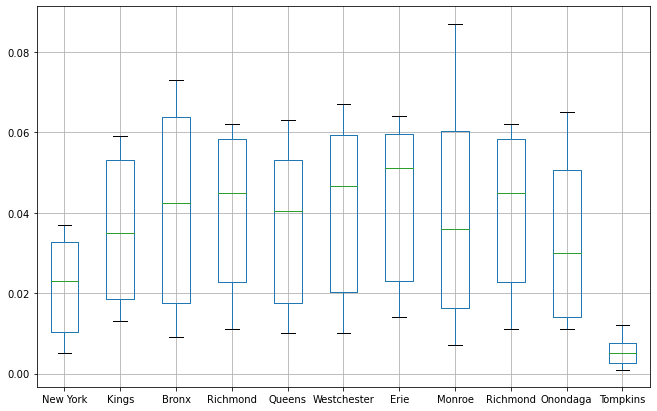

In [5]:
covid_df = pd.read_csv('nycovid.csv')
cols = [i.replace(' ', '_') for i in covid_df.columns]
covid_df.columns = cols
covid_df['Test_Date'] = pd.to_datetime(covid_df.Test_Date)
covid_df.set_index('Test_Date', inplace=True)
covid_df = covid_df.loc['2020-09-01':'2021-02-11']
covid_df['Test_Date'] = covid_df.index
covid_df['Percent'] = covid_df.Number_Positive/covid_df.Number_Tests

#covid_df = covid_df.loc['2020-11-01':'2021-02-11']
covid_df = covid_df.dropna()

covid_df = covid_df[['Test_Date', 'County', 'Percent']]
covid_df['month_year'] = covid_df.Test_Date.dt.to_period('M')
a= covid_df.groupby(by=[covid_df.month_year, 'County']).mean().unstack().round(3)
b = pd. DataFrame(np.array(a))
nyc = ['New York', 'Kings', 'Bronx', 'Richmond', 'Queens', 'Westchester', 'Erie', \
       'Monroe', 'Richmond', 'Onondaga', 'Tompkins']
b.index = a.index
b.columns = [i[1] for i in a.columns]
b = b[nyc]
b = b.T

##boxplots
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
b.T.boxplot()
plt.show()


__•__	Using the previous bulleted question's data and counties, create a heatmap of counties (y-axis) and months- September 2020 and February 11, 2021 (x-axis). Your heatmap may look like Figure 3.4.

In [6]:
b

month_year,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02
New York,0.005,0.008,0.017,0.029,0.037,0.034
Kings,0.013,0.017,0.023,0.047,0.059,0.055
Bronx,0.009,0.013,0.031,0.054,0.073,0.067
Richmond,0.011,0.017,0.040,0.061,0.062,0.050
Queens,0.010,0.014,0.028,0.053,0.063,0.053
Westchester,0.010,0.014,0.039,0.061,0.067,0.054
Erie,0.016,0.014,0.058,0.064,0.060,0.044
Monroe,0.007,0.013,0.046,0.087,0.065,0.026
Richmond,0.011,0.017,0.040,0.061,0.062,0.050
Onondaga,0.011,0.012,0.040,0.065,0.054,0.020


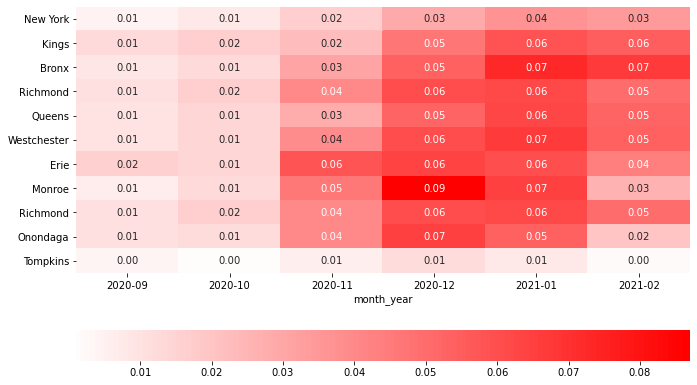

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
#sns.heatmap(b, xticklabels=b.columns, yticklabels=b.index, cmap="YlGnBu")
sns.heatmap(b, annot=True, fmt=".2f", cmap="bwr", center=0, ax=ax, cbar_kws={"orientation": "horizontal"})

plt.show()

# HOMWORK 2

__•__ Using the attached data set, create a figure similar to Figure 3.6.  Use x = DIS and y = NOX. Interpret your results.

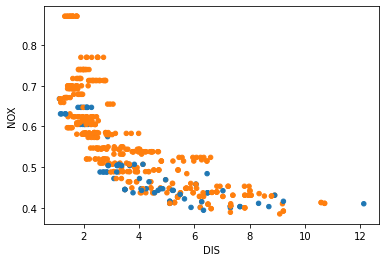

In [419]:
#Figure 3.6
# Color the points by the value of CAT.MEDV
housing_df = pd.read_csv('BostonHousing.csv')
housing_df = housing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
housing_df.plot.scatter(x='DIS', y='NOX', c=['C0' if c == 1 else 'C1' for c in housing_df.CAT_MEDV])

__•__ Using the attached data set, create a figure similar to Figure 3.8.  Use LSTAT, instead of CRIM. Interpret your results.

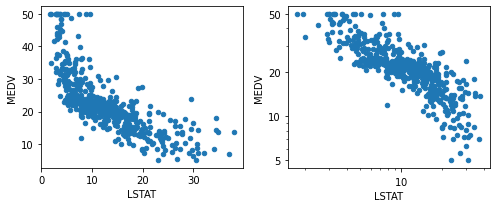

In [436]:
#Figure 3.8
# Avoid the use of scientific notation for the log axis
plt.rcParams['axes.formatter.min_exponent'] = 4

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

# Regular scale
housing_df.plot.scatter(x='LSTAT', y='MEDV', ax=axes[0])
# log scale
ax = housing_df.plot.scatter(x='LSTAT', y='MEDV', logx=True, logy=True, ax=axes[1])
ax.set_yticks([5, 10, 20, 50])
ax.set_yticklabels([5, 10, 20, 50])
plt.tight_layout()

plt.show()

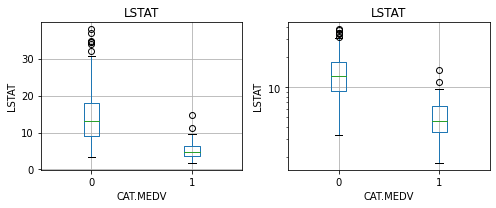

In [437]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

# regular scale
ax = housing_df.boxplot(column='LSTAT', by='CAT_MEDV', ax=axes[0])
ax.set_xlabel('CAT.MEDV')
ax.set_ylabel('LSTAT')

# log scale
ax = housing_df.boxplot(column='LSTAT', by='CAT_MEDV', ax=axes[1])
ax.set_xlabel('CAT.MEDV')
ax.set_ylabel('LSTAT')
ax.set_yscale('log')

# suppress the title
axes[0].get_figure().suptitle('')
plt.tight_layout()

plt.show()

# HOMEWORK 3

__•__	Create two network graphs similar to Figure 3.14. Use the Flight Delays data attached. 

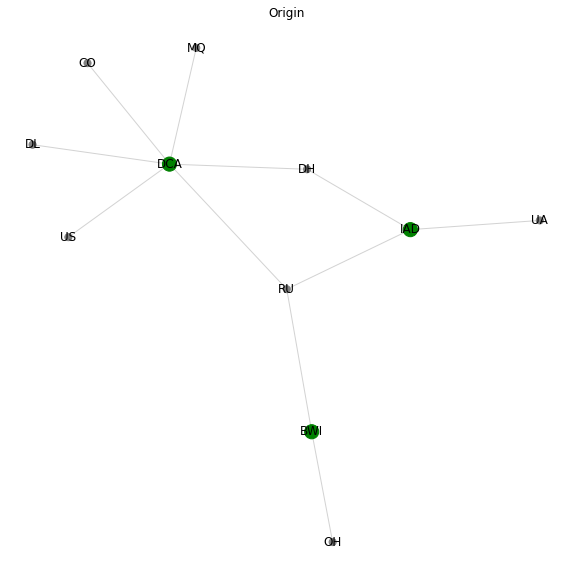

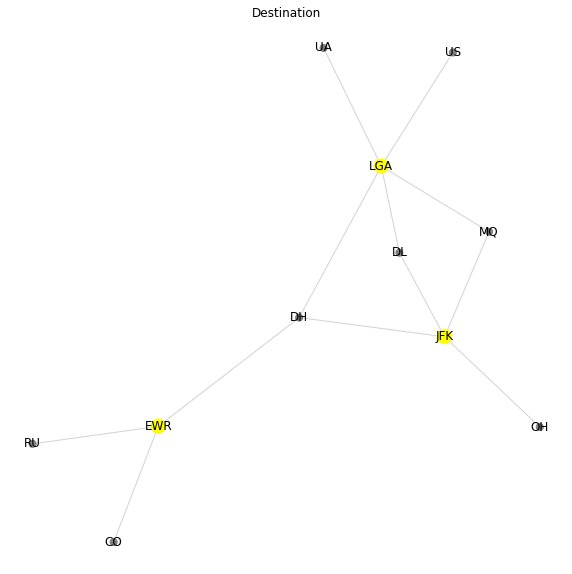

In [451]:
#For the first graph, use source as ORIGIN and target as CARRIER
flights_df = pd.read_csv('FlightDelays.csv')

G = nx.from_pandas_edgelist(flights_df, source='ORIGIN', target='CARRIER')

isCarrier = [n in set(flights_df.CARRIER) for n in G.nodes()]
pos = nx.spring_layout(G, k=0.13, iterations=60, scale=0.5)
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=pos, with_labels=True,
                 edge_color='lightgray',
                 node_color=['gray' if carrier else 'green' for carrier in isCarrier],
                 node_size=[50 if carrier else 200 for carrier in isCarrier])
plt.axis('off')
plt.title('Origin')

plt.show()

#For the second graph, use source as DEST and target as CARRIER
G = nx.from_pandas_edgelist(flights_df, source='DEST', target='CARRIER')

isCarrier = [n in set(flights_df.CARRIER) for n in G.nodes()]
pos = nx.spring_layout(G, k=0.13, iterations=60, scale=0.5)
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=pos, with_labels=True,
                 edge_color='lightgray',
                 node_color=['gray' if carrier else 'yellow' for carrier in isCarrier],
                 node_size=[50 if carrier else 200 for carrier in isCarrier])
plt.axis('off')
plt.title('Destination')
plt.show()
